# COVID-19 Case Surveillance -US-CDC DATASET- Predictors for Hospitlisations

### INTRODUCTION:
Covid 19 pandemic has had an impact on almost every aspect of our life. Compared to other viruses it was not the most lethal or more virulent but it's rapid transmission and adverse effects on certain population groups increased the need for hospitlisation in a large number of population in a short period of time. The major concern for Covid was pressure on the limited health services like beds and icus to be provided to people coming at a fatser rate in a short period of time.
Covid has been found to be asymptomatic in most of the cases. Although the number of covid cases id decreasing day byday it is important to find the pattern in various geographical, demographic and epidemiological factors which were associated with the most of the hospitlisations.

### PROBLEM STATEMENT:
Find the predictors for the COVID hospitlisation in US based on geographical, demographic and epidemiological factors to build a model to predict the need for hospitilisation in a patient.

### STAKEHOLDERS:
1. Doctors and medical professionals may be able to triage various patients according to presence and absence of predictors.

2. Health Organisations and Government Bodies: it can help them to better facilitate the medical supplies and vaccination drives to the Geographic areas and the suseptible population groups based on socio economic status , ethinicity, race etc.

3. Pharmaceutical companies and other medical device companies (mask, icu) can market their covid products more in the areas of need.

4. Small and local Businesses can manage and take proper decisions based on the trend in increase or decrease in covid cases in their geographical area.

5. General Population- Information about the covid incidence as well as risk of hospitlisation may help general population take necessary measures in time of need and also otherwise.

In [390]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
from scipy import stats
import os
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## DATA UNDERSTANDING

In [261]:

df=pd.read_json('https://data.cdc.gov/resource/n8mc-b4w4.json')

In [262]:
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_positive_specimen,underlying_conditions_yn
0,2020-08,KY,21,GRAYSON,21085,0 - 17 years,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN
1,2021-01,NC,37,MARTIN,37117,0 - 17 years,NA,NA,NA,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,0.0,NaN
2,2021-03,VT,50,FRANKLIN,50011,18 to 49 years,NA,NA,NA,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,0.0,Yes
3,2020-09,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN,NaN
4,2021-04,PA,42,CLINTON,42035,0 - 17 years,Female,NA,NA,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,NA,0.0,NaN


In [263]:
df.shape

(1000, 19)

In [264]:
df.dtypes

case_month                   object
res_state                    object
state_fips_code               int64
res_county                   object
county_fips_code             object
age_group                    object
sex                          object
race                         object
ethnicity                    object
case_onset_interval         float64
process                      object
exposure_yn                  object
current_status               object
symptom_status               object
hosp_yn                      object
icu_yn                       object
death_yn                     object
case_positive_specimen      float64
underlying_conditions_yn     object
dtype: object

In [265]:
df.isnull().sum()

case_month                    0
res_state                     0
state_fips_code               0
res_county                    0
county_fips_code              0
age_group                     0
sex                           0
race                          0
ethnicity                     0
case_onset_interval         519
process                       0
exposure_yn                   0
current_status                0
symptom_status                0
hosp_yn                       0
icu_yn                        0
death_yn                      0
case_positive_specimen      711
underlying_conditions_yn    942
dtype: int64

In [343]:
df.dtypes

case_month          datetime64[ns]
res_state                   object
state_fips_code             object
res_county                  object
county_fips_code            object
age_group                   object
sex                         object
race                        object
ethnicity                   object
process                     object
exposure_yn                 object
current_status              object
symptom_status              object
hosp_yn                     object
icu_yn                      object
death_yn                    object
FIPS                        object
month                        int64
year                         int64
dtype: object

## DATA CLEANING

## DEALING WITH MISSING VALUES:

In [266]:
(df.isnull().sum()/len(df))*100

case_month                   0.0
res_state                    0.0
state_fips_code              0.0
res_county                   0.0
county_fips_code             0.0
age_group                    0.0
sex                          0.0
race                         0.0
ethnicity                    0.0
case_onset_interval         51.9
process                      0.0
exposure_yn                  0.0
current_status               0.0
symptom_status               0.0
hosp_yn                      0.0
icu_yn                       0.0
death_yn                     0.0
case_positive_specimen      71.1
underlying_conditions_yn    94.2
dtype: float64

In [267]:
# drop the columns with more than 50% values missing
df.drop(['case_onset_interval','case_positive_specimen','underlying_conditions_yn'],axis=1,inplace=True)

In [268]:
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn
0,2020-08,KY,21,GRAYSON,21085,0 - 17 years,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No
1,2021-01,NC,37,MARTIN,37117,0 - 17 years,NA,NA,NA,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No
2,2021-03,VT,50,FRANKLIN,50011,18 to 49 years,NA,NA,NA,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No
3,2020-09,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing
4,2021-04,PA,42,CLINTON,42035,0 - 17 years,Female,NA,NA,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,NA


In [269]:
#finding columns with only 1 unique values
unique=df.nunique()
unique=unique[df.nunique()==1]
unique

Series([], dtype: int64)

In [270]:
df['state_fips_code'].unique()

array([21, 37, 50, 13, 42, 41,  5, 39, 40, 23, 55, 45, 47, 28, 19, 26,  8,
       36, 25,  6,  1, 27, 51, 31, 17, 53, 30, 48, 24, 33, 18, 12, 20, 16,
       44, 29, 22, 34, 10, 49, 35,  9,  4, 38, 32,  2, 46, 54],
      dtype=int64)

In [271]:
# remove the redundant values :
d=['0NA','NA']
df=df.loc[~(df.county_fips_code.isin(d)),:]


In [272]:
(df['county_fips_code'].unique()=='0NA').sum()

0

In [411]:
# adding the 00's to the fips code 
df['state_fips_code'] = df['state_fips_code'].apply(lambda x: str(x).zfill(2))
df['county_fips_code'] = df['county_fips_code'].apply(lambda x: str(x).zfill(3))
df['FIPS'] = df['state_fips_code'] + df['county_fips_code']

In [412]:
(df['county_fips_code'].unique()=='NA').sum()

0

In [414]:
# A number of our columns have a very high percent of unknown, missing and NA values which more or else refers the same thing. we replaced all with'unknown'
for i in df.columns:
    if i not in ['case_month','month','year']:
        df[i]=[x.replace('Missing','Unknown') for x in df[i]]
        df[i]=[x.replace('NA','Unknown') for x in df[i]]

In [415]:
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,FIPS,month,year
0,2020-08-01,KY,21,GRAYSON,21085,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,2121085,8,2020
1,2021-01-01,NC,37,MARTIN,37117,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,3737117,1,2021
2,2021-03-01,VT,50,FRANKLIN,50011,18 to 49 years,Unknown,Unknown,Unknown,Unknown,Yes,Laboratory-confirmed case,Symptomatic,No,Unknown,No,5050011,3,2021
3,2020-09-01,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Unknown,1313047,9,2020
4,2021-04-01,PA,42,CLINTON,42035,0 - 17 years,Female,Unknown,Unknown,Unknown,Yes,Laboratory-confirmed case,Symptomatic,No,No,Unknown,4242035,4,2021


### DERIVED METRICS

In [416]:
df['case_month']=pd.to_datetime(df['case_month'])

In [417]:
df['month']=df['case_month'].dt.month
df['year']=df['case_month'].dt.year

In [418]:
df['case_month'].value_counts()

2020-12-01    191
2020-11-01    156
2021-01-01    129
2020-10-01     72
2020-07-01     70
2021-03-01     54
2020-09-01     53
2021-02-01     48
2020-08-01     48
2020-06-01     45
2021-04-01     39
2020-05-01     35
2020-04-01     24
2021-05-01     24
2020-03-01      5
2021-06-01      5
Name: case_month, dtype: int64

## EDA

In [419]:
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,FIPS,month,year
0,2020-08-01,KY,21,GRAYSON,21085,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,2121085,8,2020
1,2021-01-01,NC,37,MARTIN,37117,0 - 17 years,Unknown,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,3737117,1,2021
2,2021-03-01,VT,50,FRANKLIN,50011,18 to 49 years,Unknown,Unknown,Unknown,Unknown,Yes,Laboratory-confirmed case,Symptomatic,No,Unknown,No,5050011,3,2021
3,2020-09-01,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Unknown,Unknown,Unknown,Laboratory-confirmed case,Unknown,Unknown,Unknown,Unknown,1313047,9,2020
4,2021-04-01,PA,42,CLINTON,42035,0 - 17 years,Female,Unknown,Unknown,Unknown,Yes,Laboratory-confirmed case,Symptomatic,No,No,Unknown,4242035,4,2021


In [420]:
df.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'FIPS', 'month', 'year'],
      dtype='object')

## CATEGORICAL DATA

## UNIVARIATE ANALYSIS

In [421]:
# function for univariate analysis for categorical variables
def univariate_cate(data,col):
    data[col].value_counts().to_frame()
    
    fig,ax =plt.subplots(figsize=(16,8))
    sns.countplot(df[col],order = df[col].value_counts().index)
    plt.xticks(size=12)
    plt.xlabel(col, size=14)
    plt.yticks(size=12)
    plt.ylabel('number of patients', size=12)
    plt.title(col+" distribution", size=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
 
    total = len(df)
    for p in ax.patches:
               percentage = f'{round(100 * p.get_height() / total,2):.1f}%\n'
               x = p.get_x() + p.get_width() / 2
               y = p.get_height()
               ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()

# TARGET VARIABLE- Hosp_yn

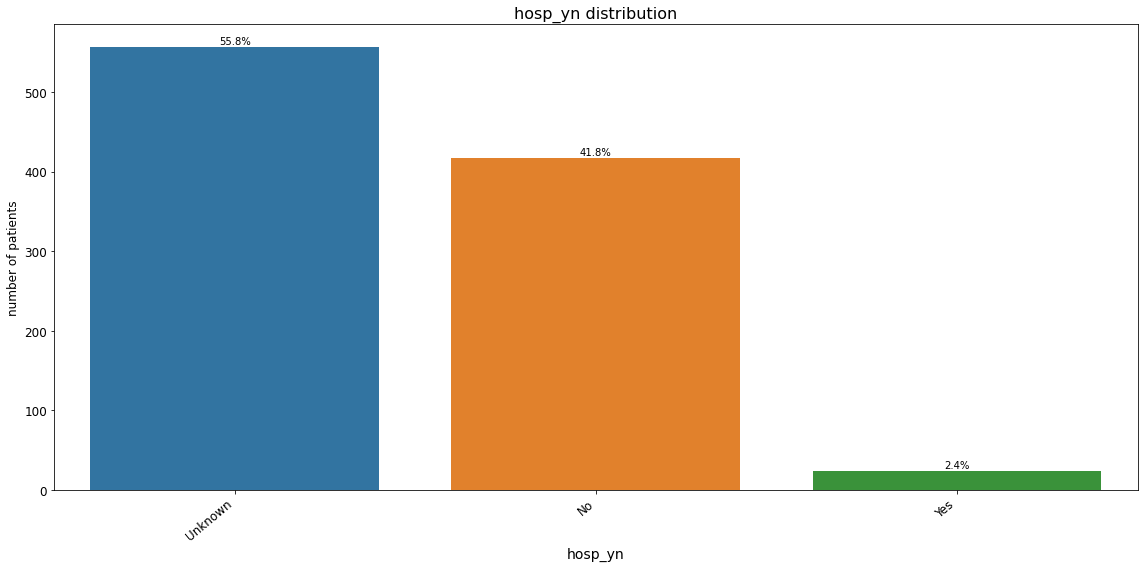

In [422]:
univariate_cate(df,'hosp_yn')

case_month


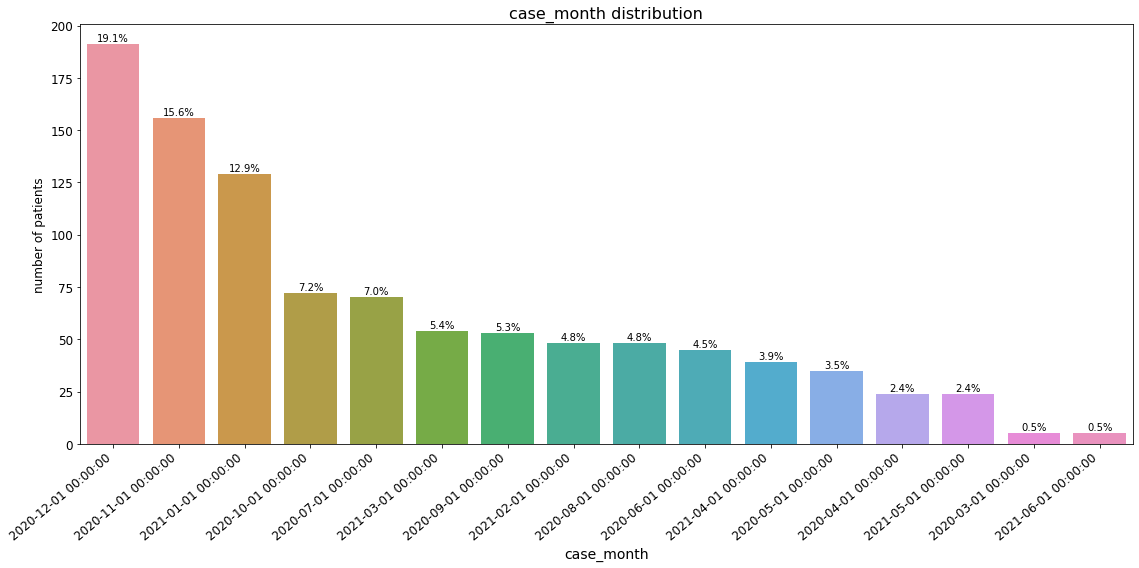

res_state


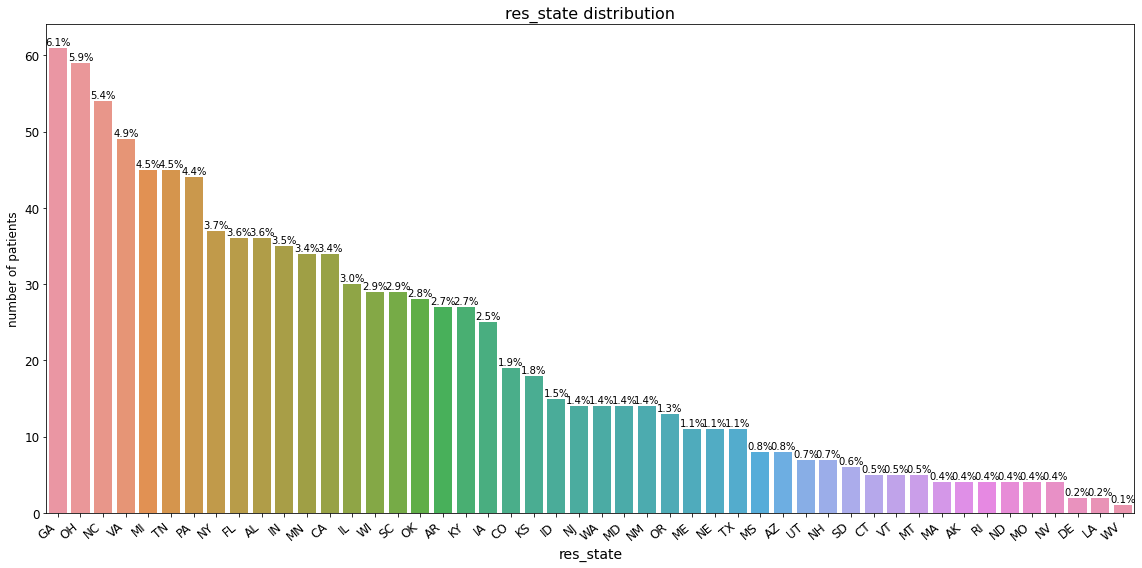

state_fips_code


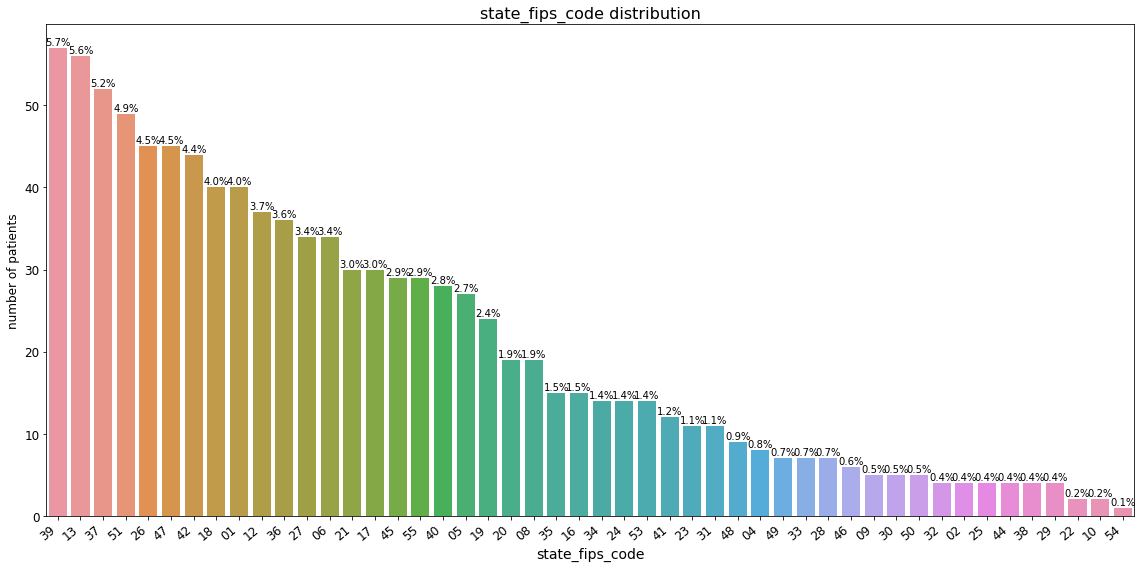

age_group


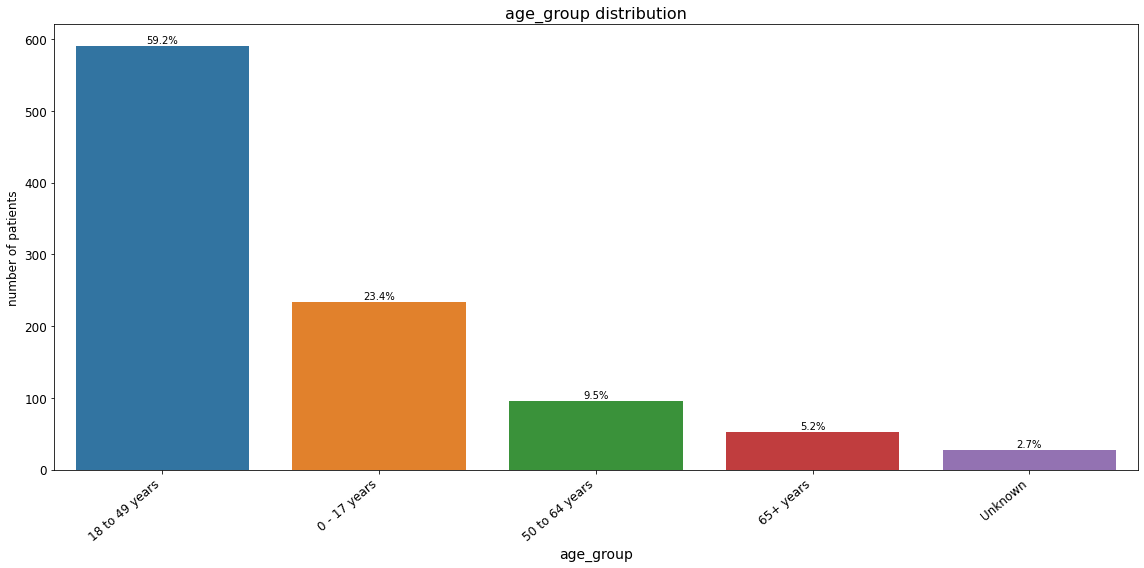

sex


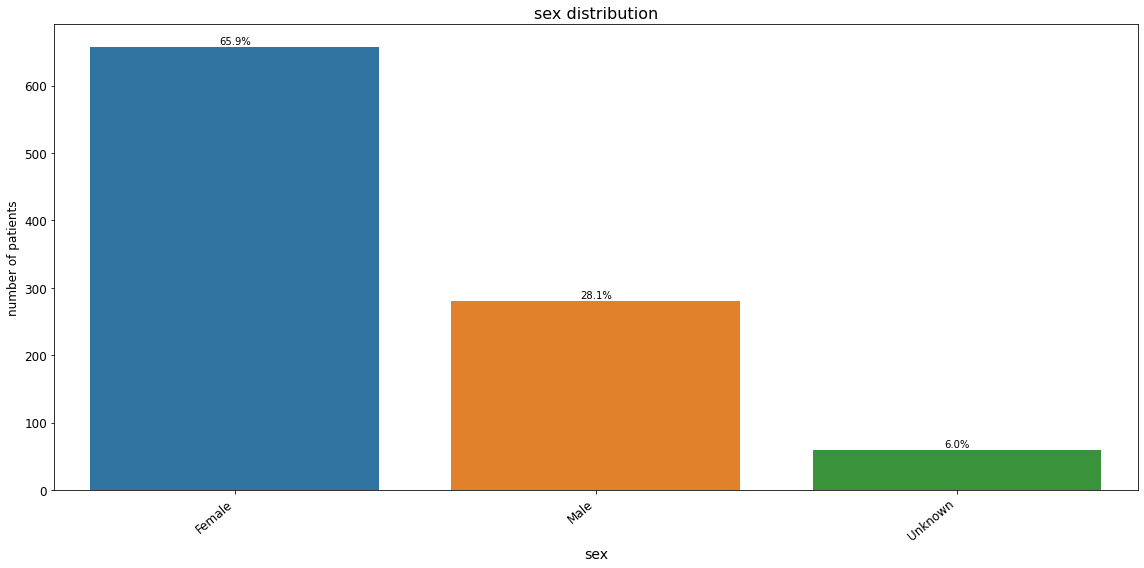

race


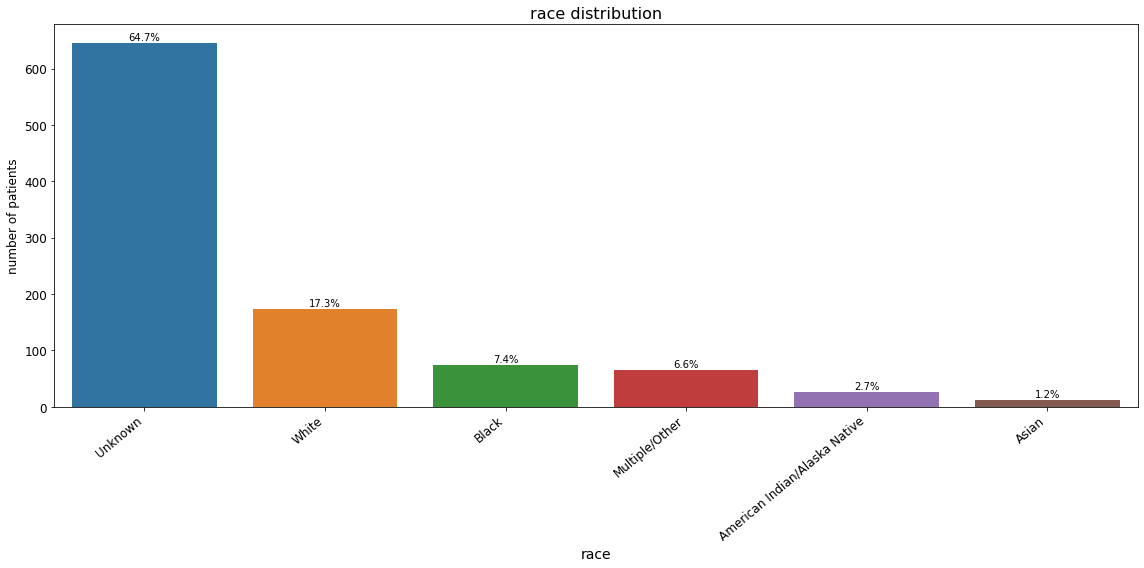

ethnicity


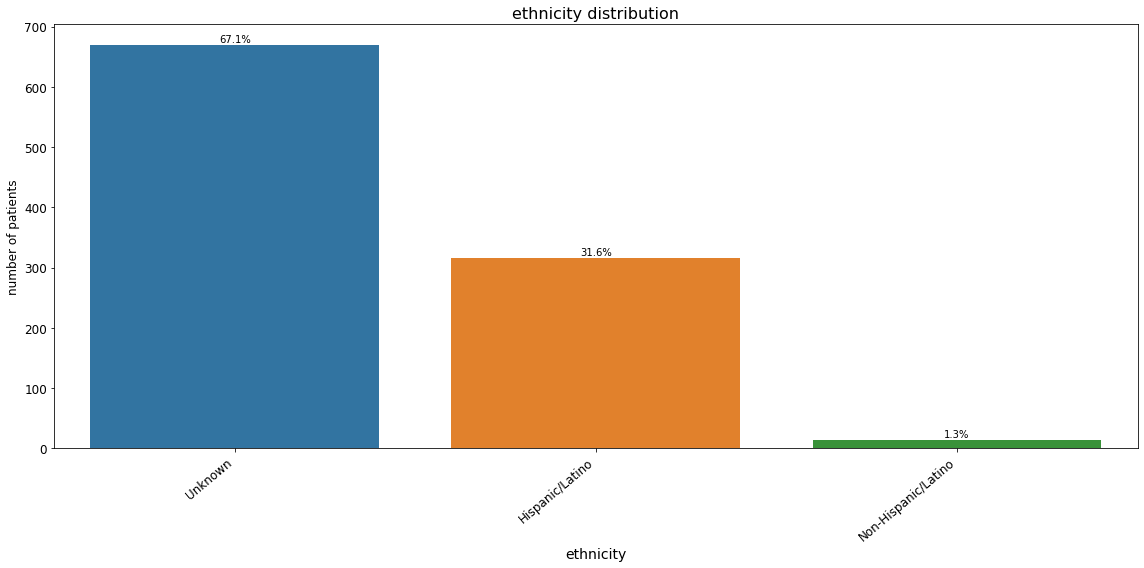

process


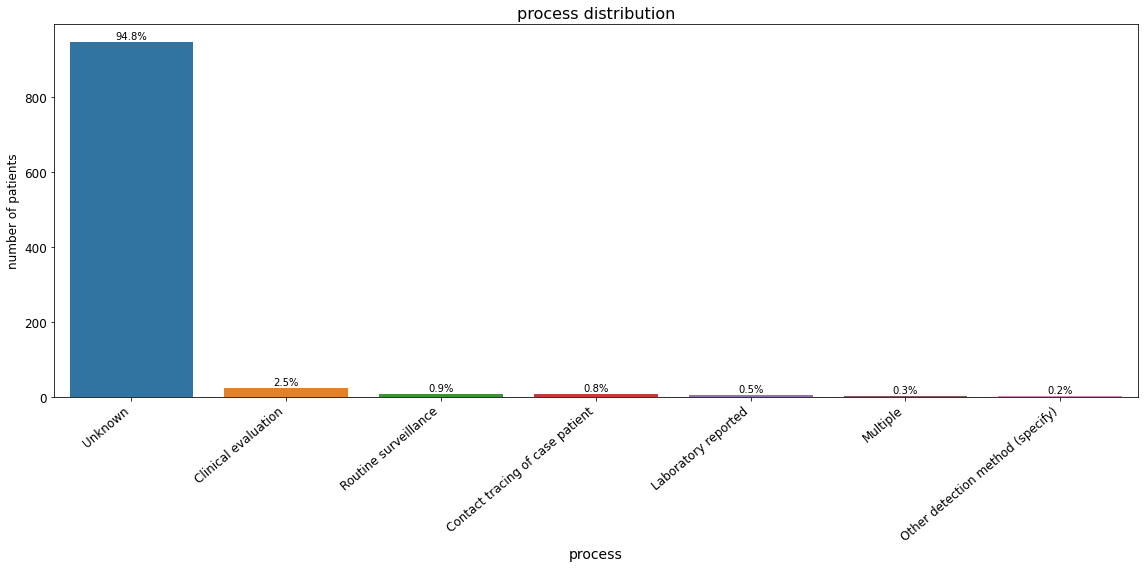

exposure_yn


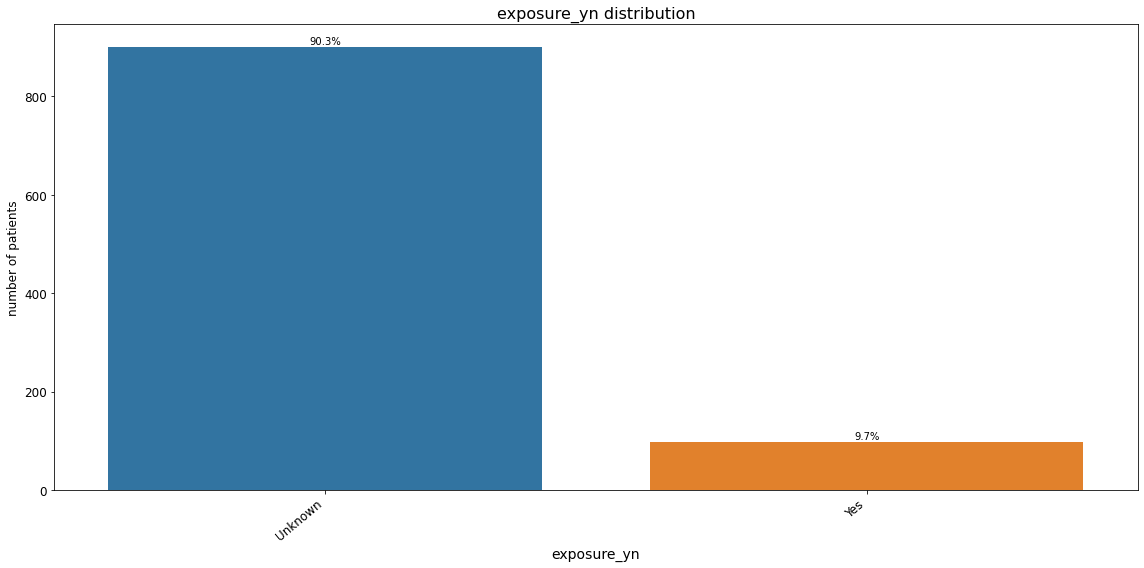

current_status


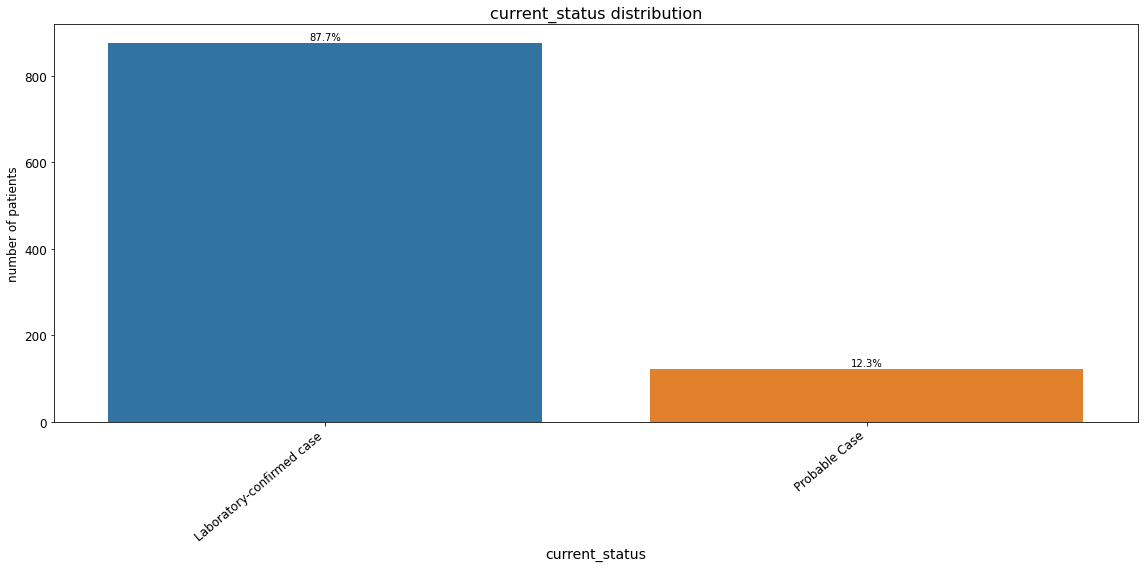

symptom_status


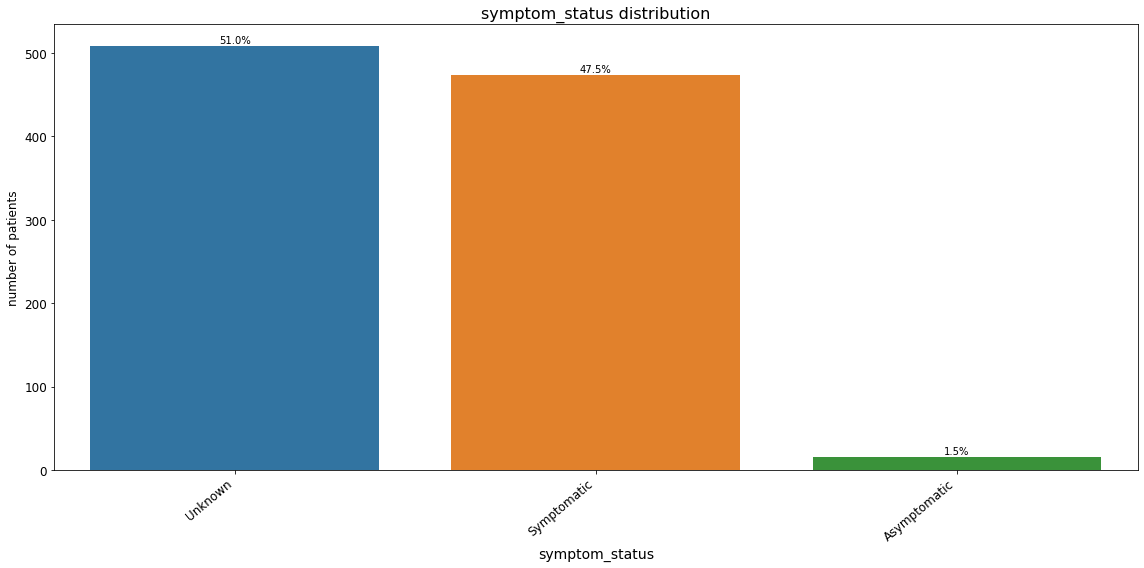

hosp_yn


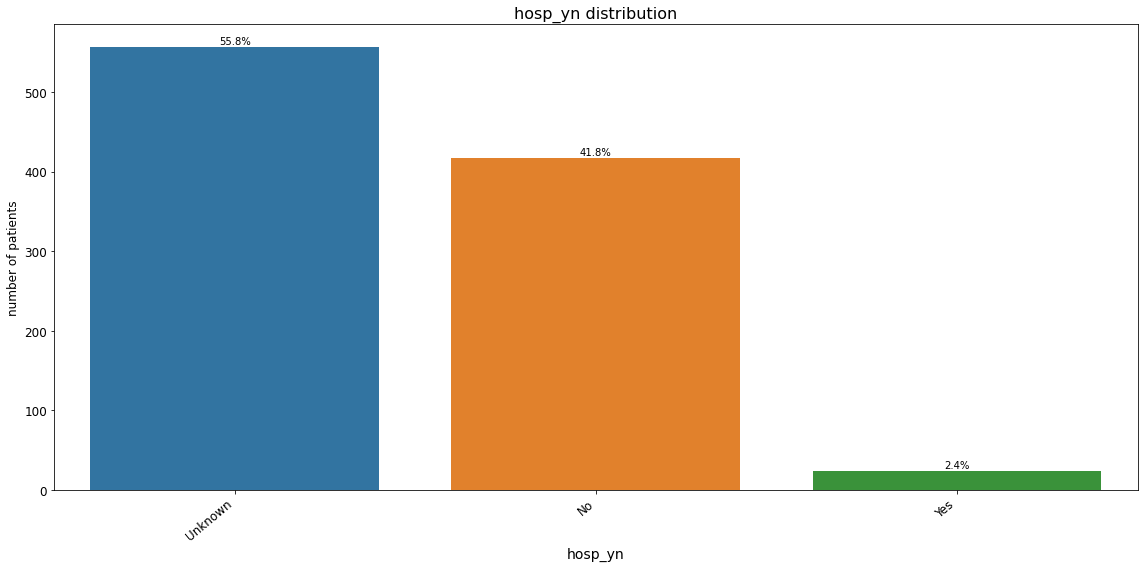

icu_yn


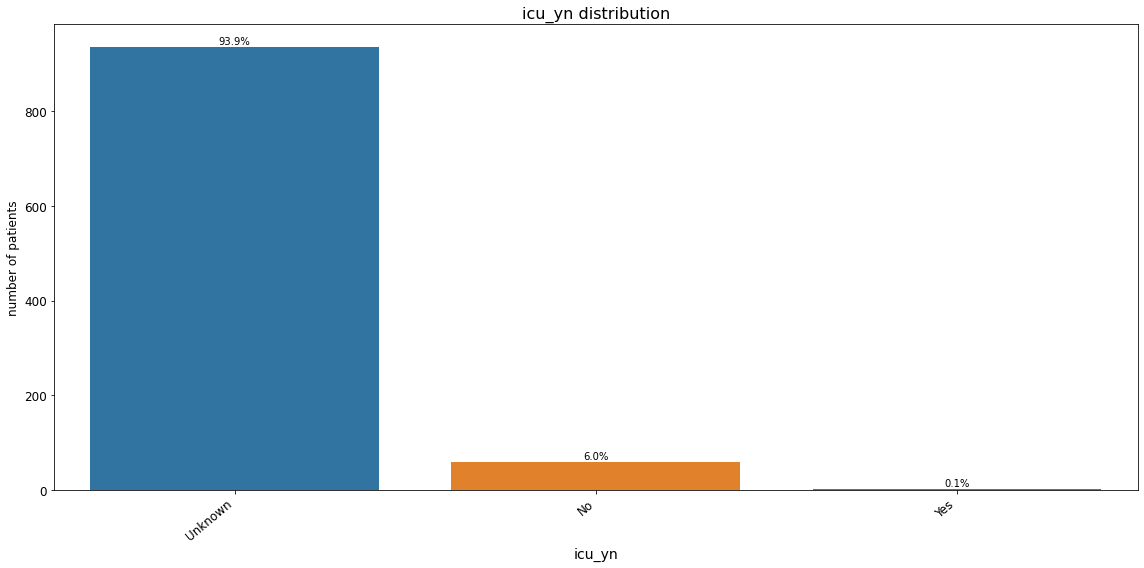

death_yn


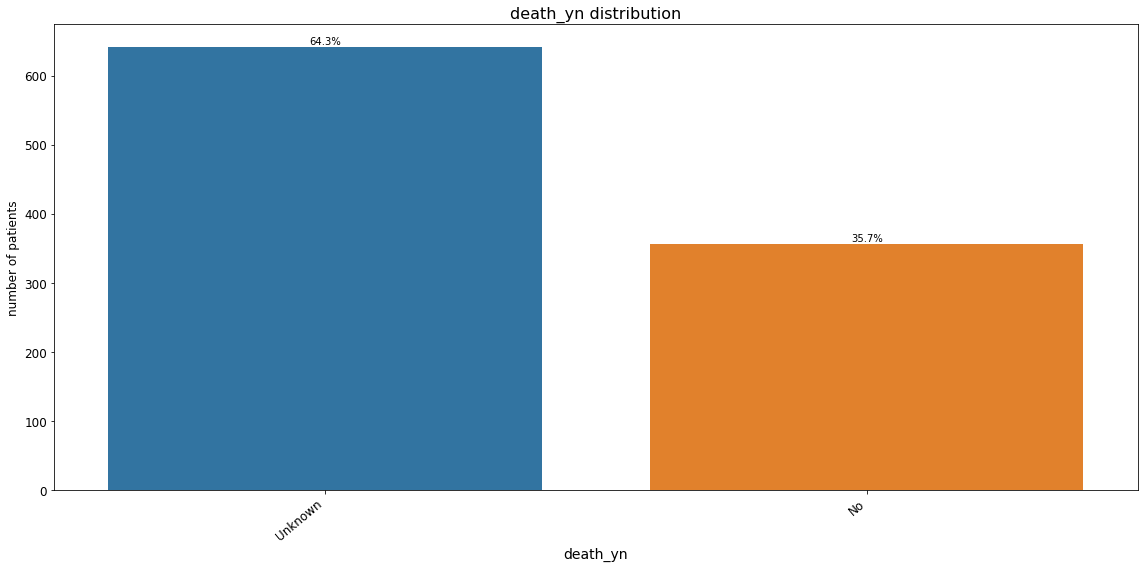

month


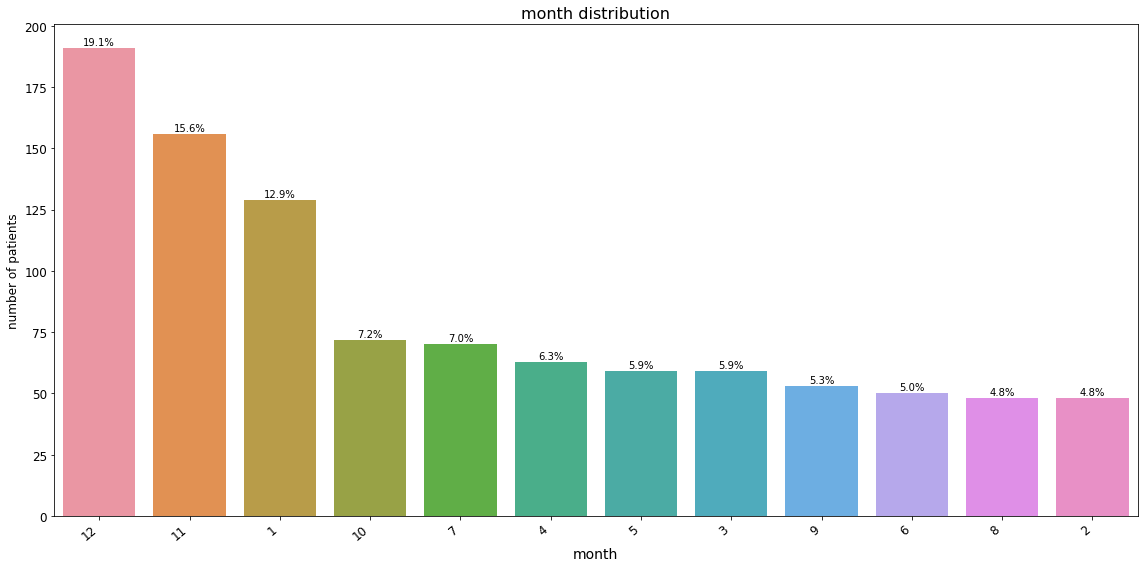

year


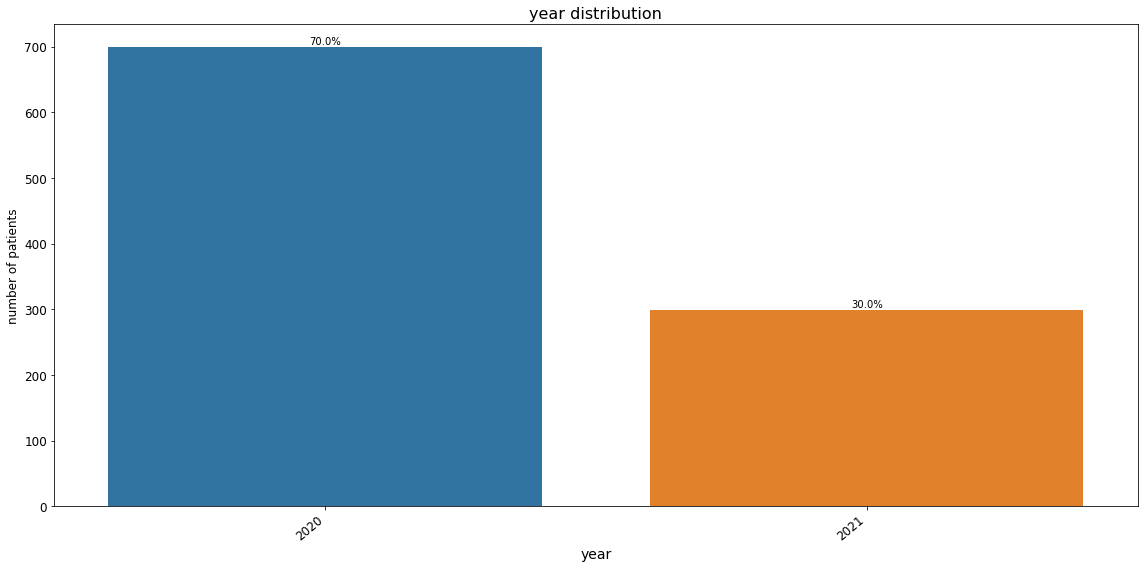

In [423]:
for i in df.columns:
    if i not in ['county_fips_code','res_county','FIPS']:
        print(i)
        univariate_cate(df,i)

In [424]:
df['res_county'].value_counts()

JEFFERSON        14
WASHINGTON       13
FRANKLIN         12
CARROLL           8
MARION            8
                 ..
POTTAWATTAMIE     1
RICHMOND CITY     1
AMHERST           1
GIBSON            1
DUBUQUE           1
Name: res_county, Length: 731, dtype: int64

# BIVARIATE ANALYSIS

In [425]:
from scipy.stats import chi2_contingency

In [426]:
def bivariate_cate(data,col1,col2):
    # count plot for the column wrt to the hospitalisation
    print(col1)
    fig,ax=plt.subplots(figsize=(16,8))# plot the fig
    sns.countplot(x=col1, hue=col2, data=df, palette="spring",order=df[col1].value_counts().index)
    plt.title(col1+ ' vs' +col2+ 'plot',fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
    
    
    # crosstab percentage table(along rows) between the variable and the hospital(count/sum*100)
    q=pd.crosstab(df[col1],df['hosp_yn']).apply(lambda x:100*x/x.sum(),axis=1)
    
    q['hosp_probability']=[x for x in q['Yes']]
    q=q.reset_index()
    
    g = sns.catplot(x=col1,y='hosp_probability',kind='bar',data=q,palette='Blues',height=5,aspect=3)
    g.ax.set_ylim(0,100)
    g.ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.title(col1 + 'hosp probabilty Plot',fontsize=25)
    # for annotations
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)  
        
# calculate the p value chi2_contigency (hypothesis testing:H0: two variables are independant,H1:two variables are dependant)
def chi_contigen(data,col1,col2):   
    print(col1)
    table=data.groupby([col1, col2])[col2].count().unstack().fillna(0)
    
    
    stat, p, dof, expected = chi2_contingency(table)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    

case_month
res_state
state_fips_code
age_group
sex
race
ethnicity
process
exposure_yn
current_status
symptom_status
hosp_yn
icu_yn
death_yn
month
year


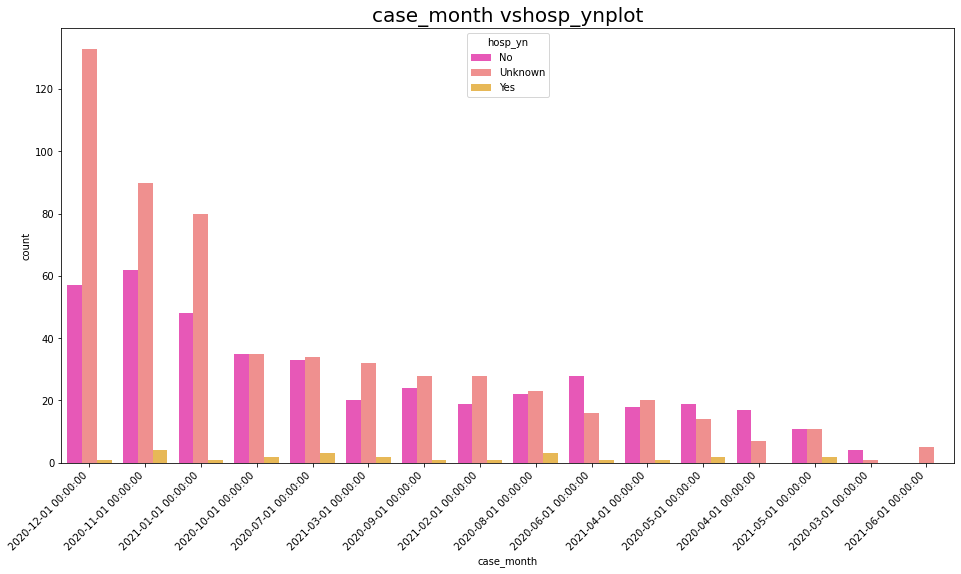

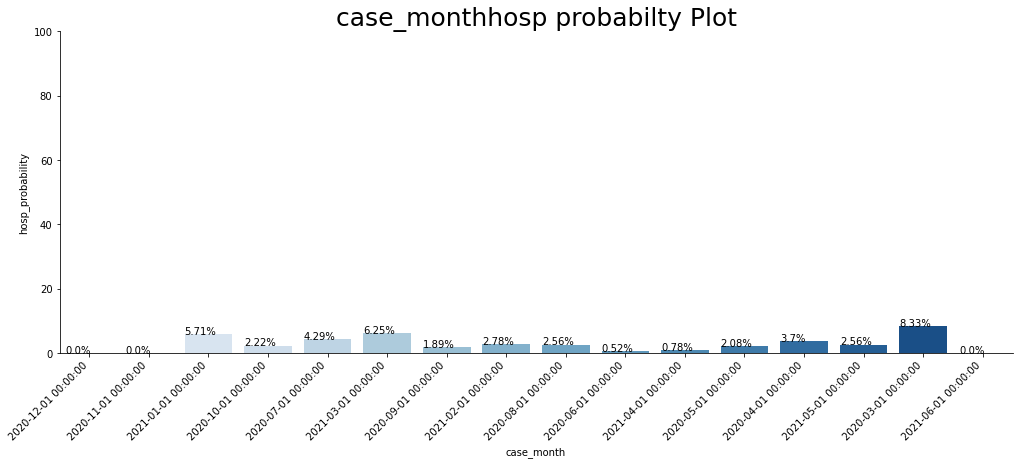

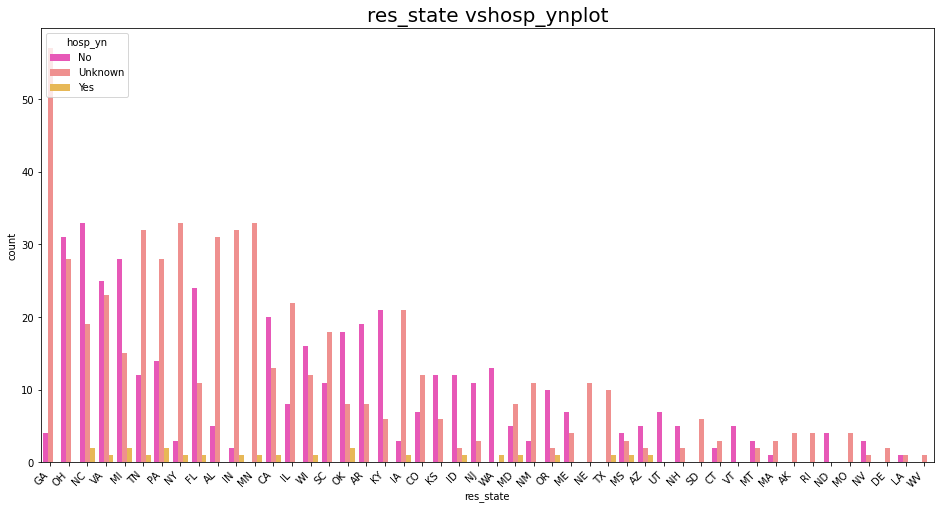

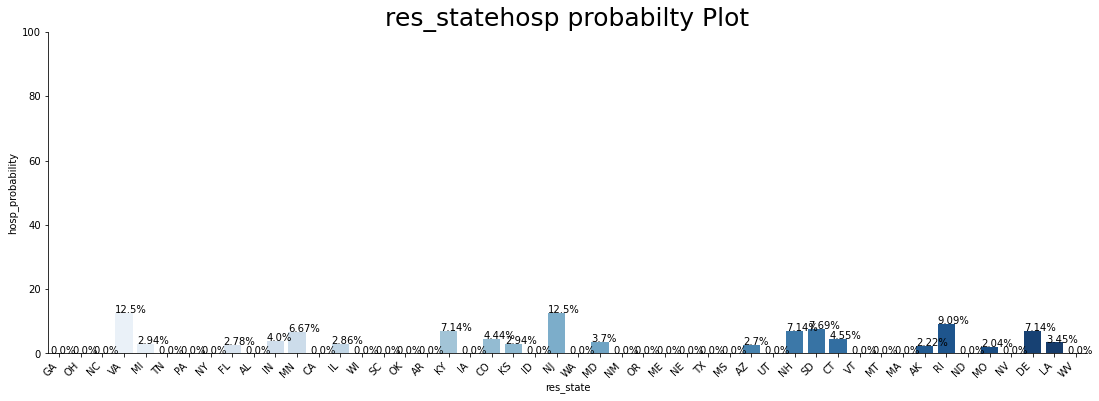

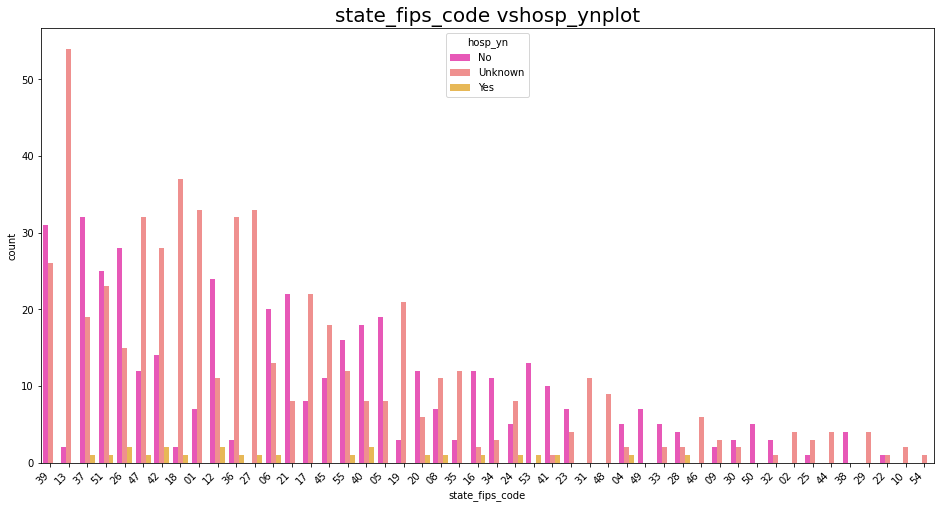

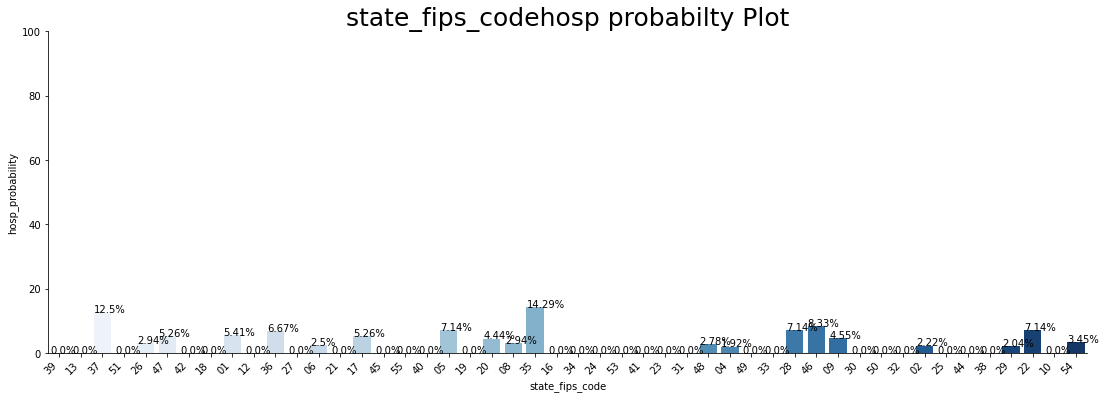

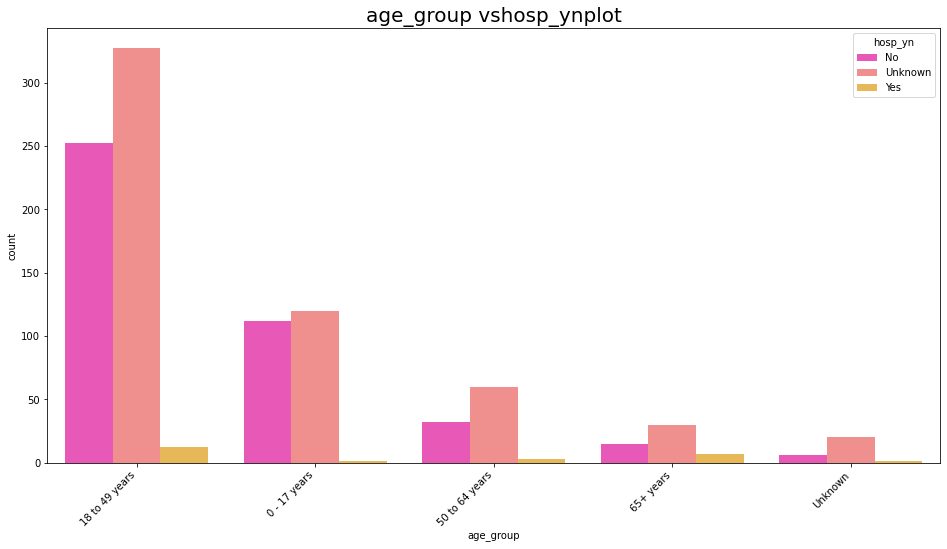

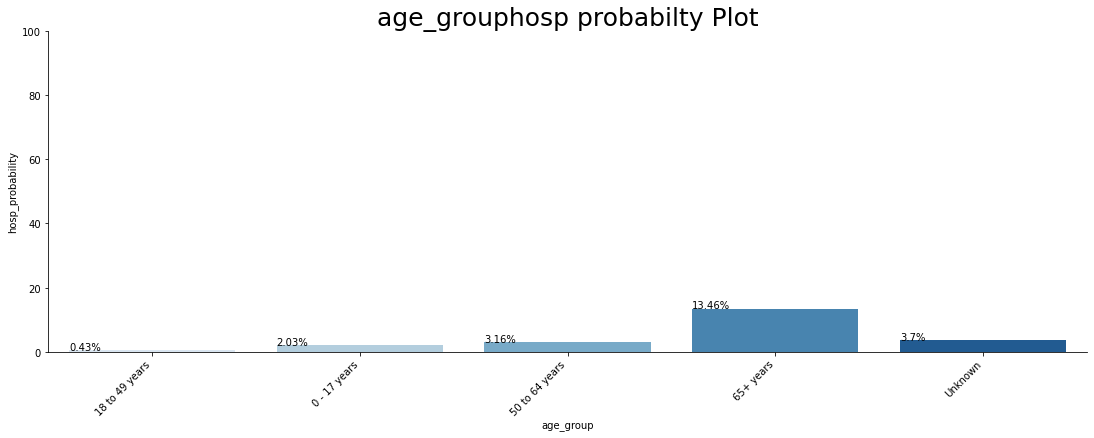

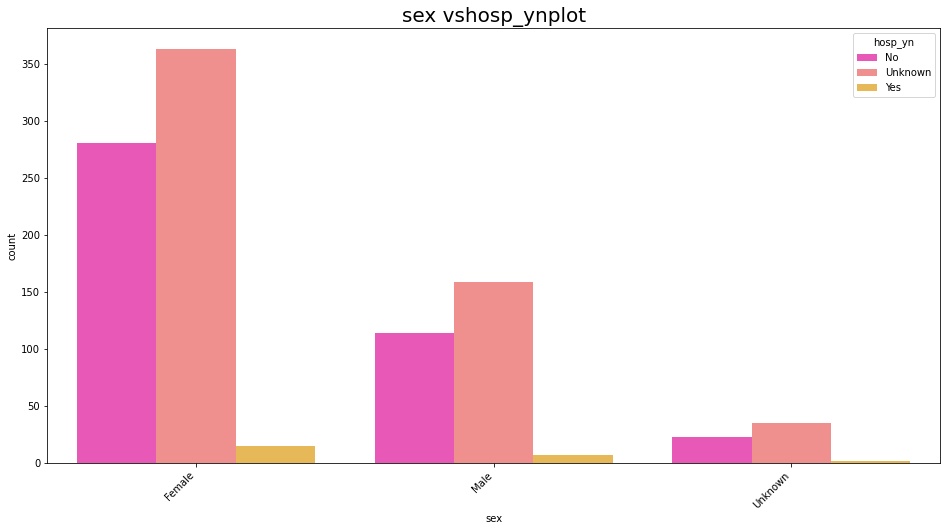

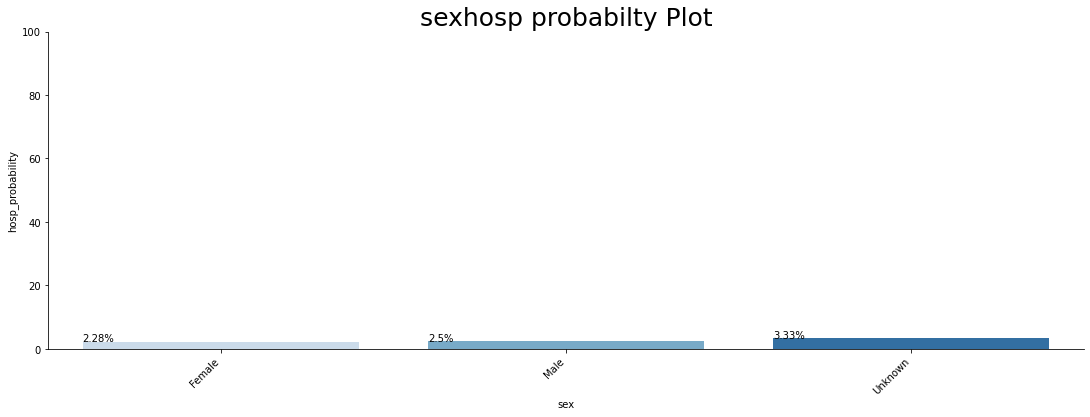

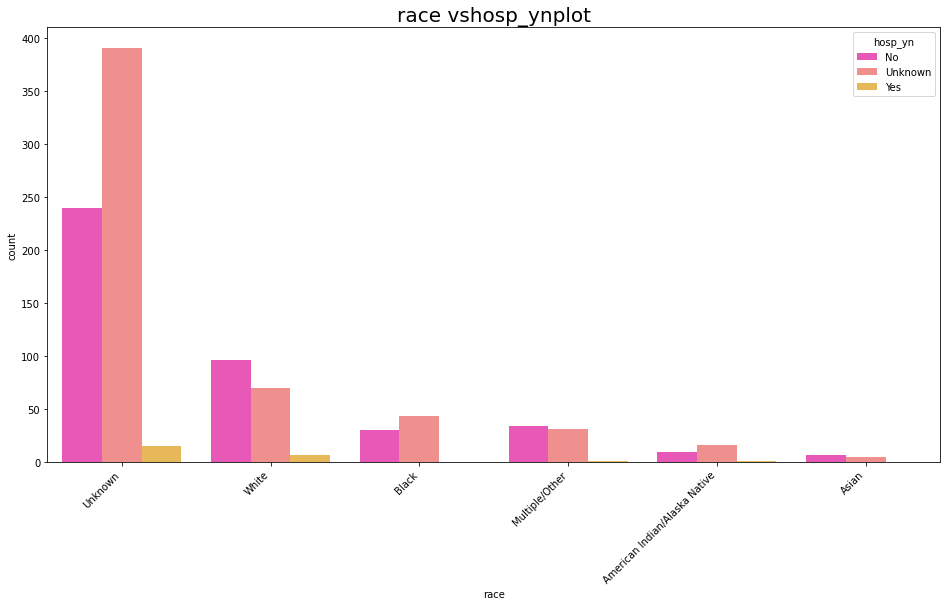

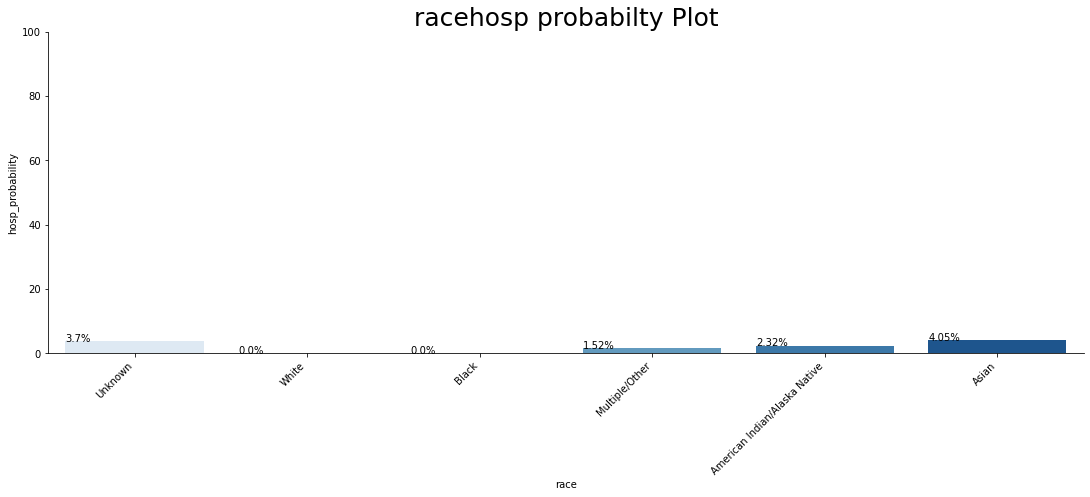

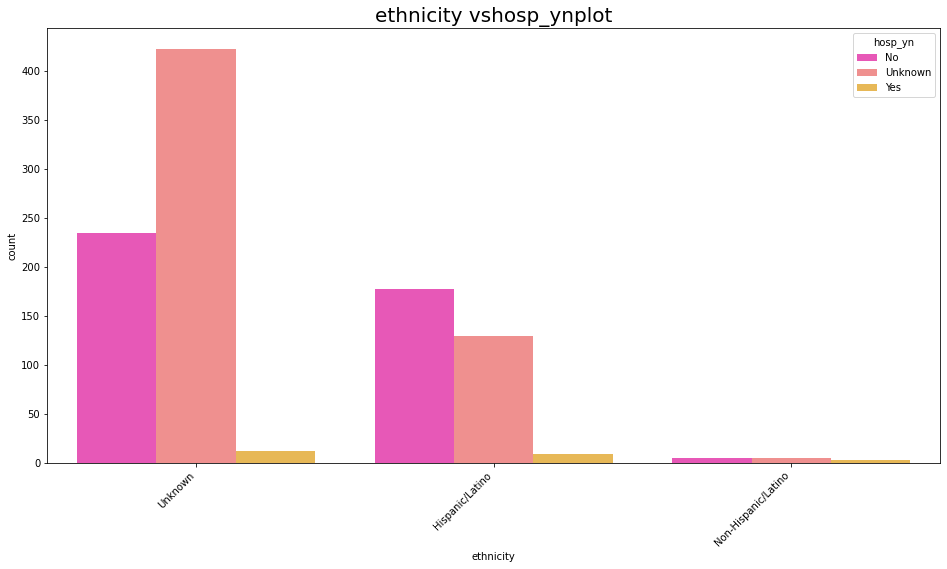

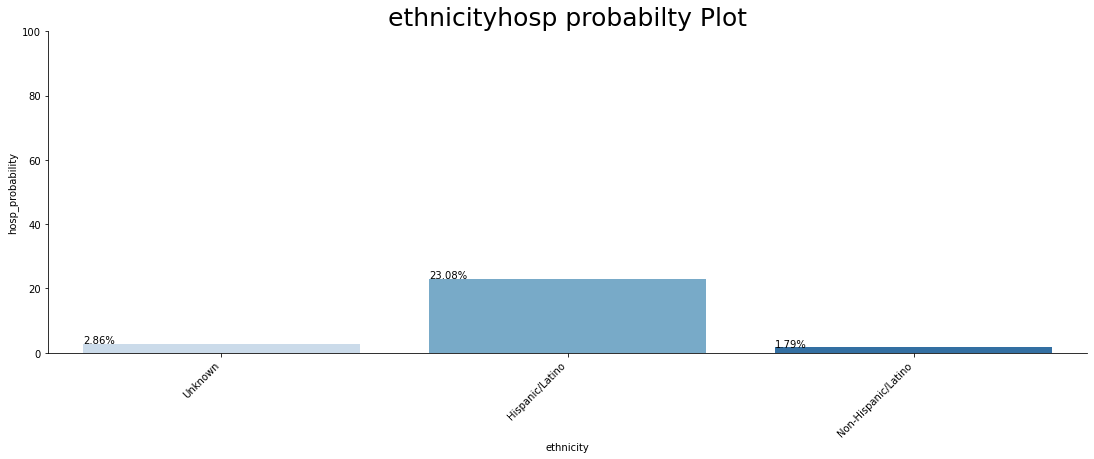

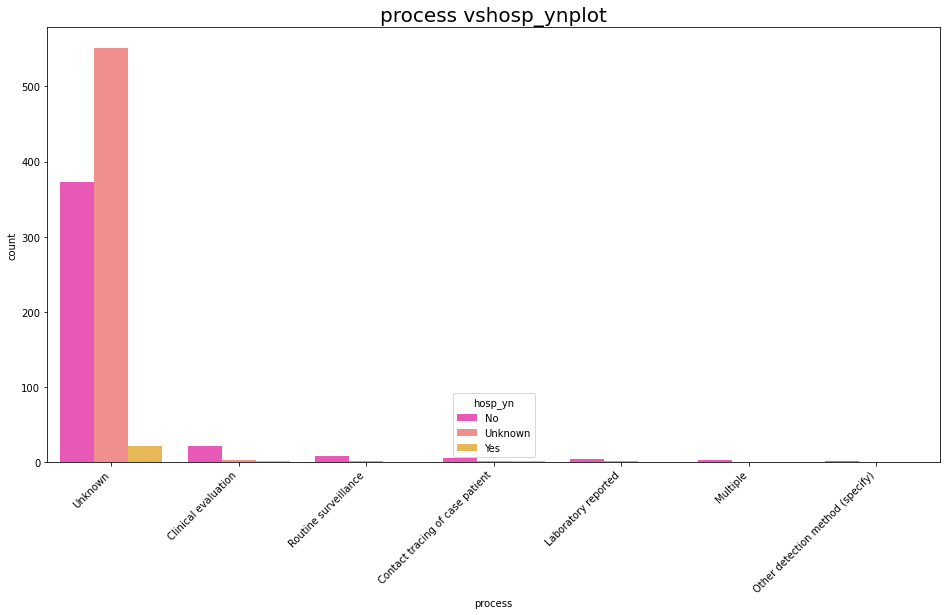

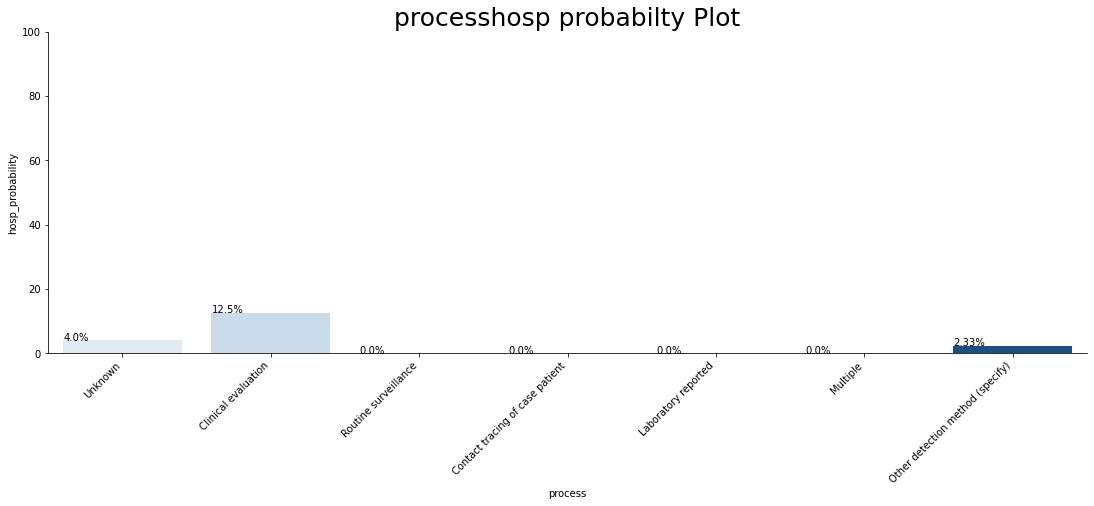

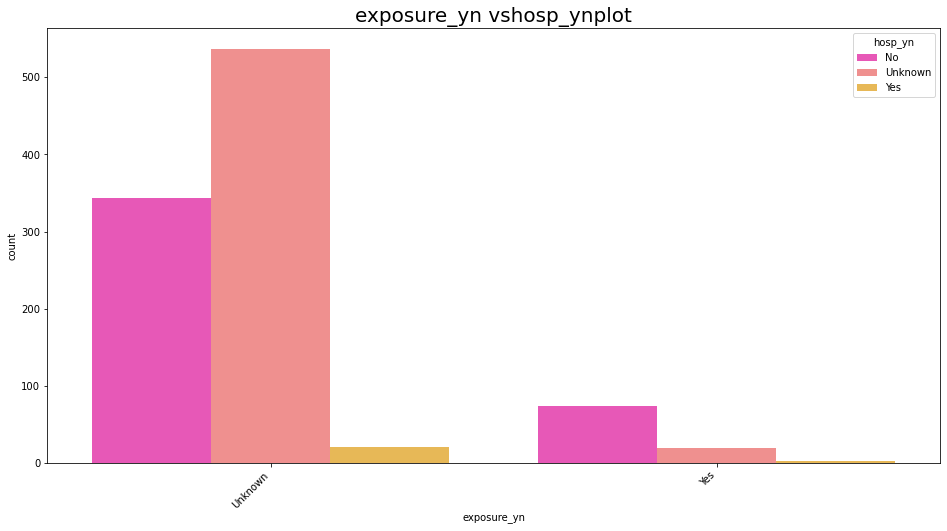

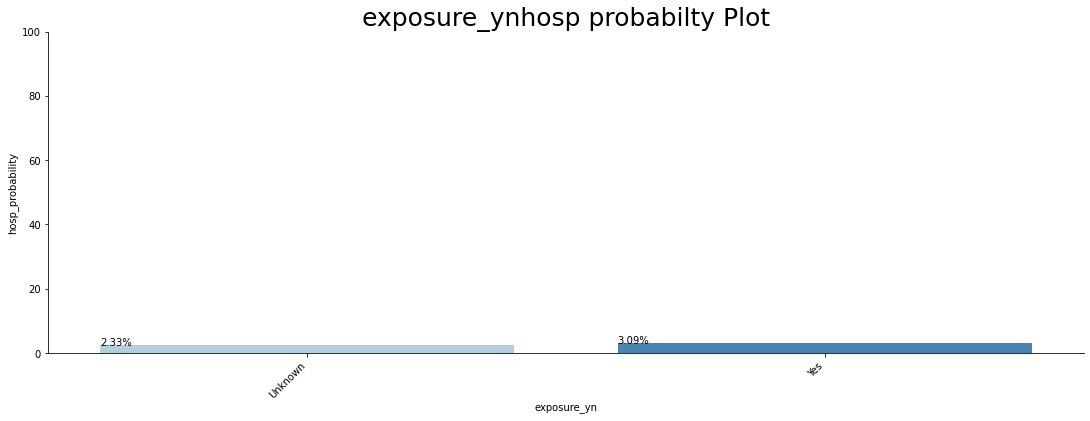

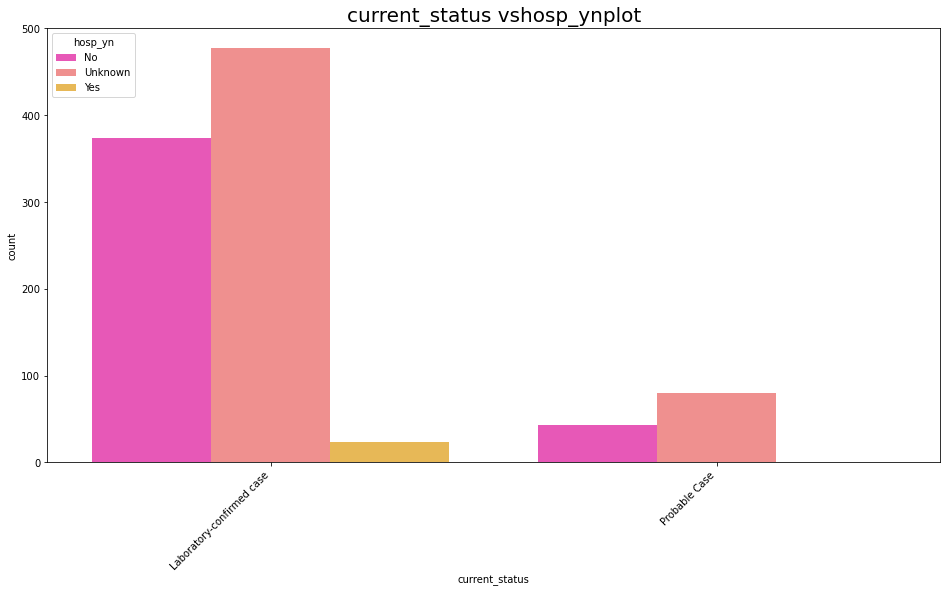

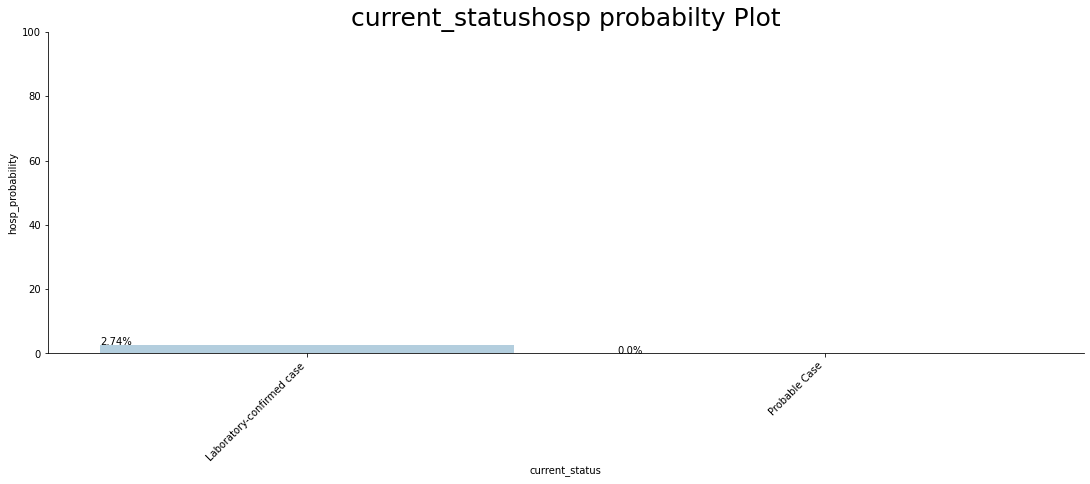

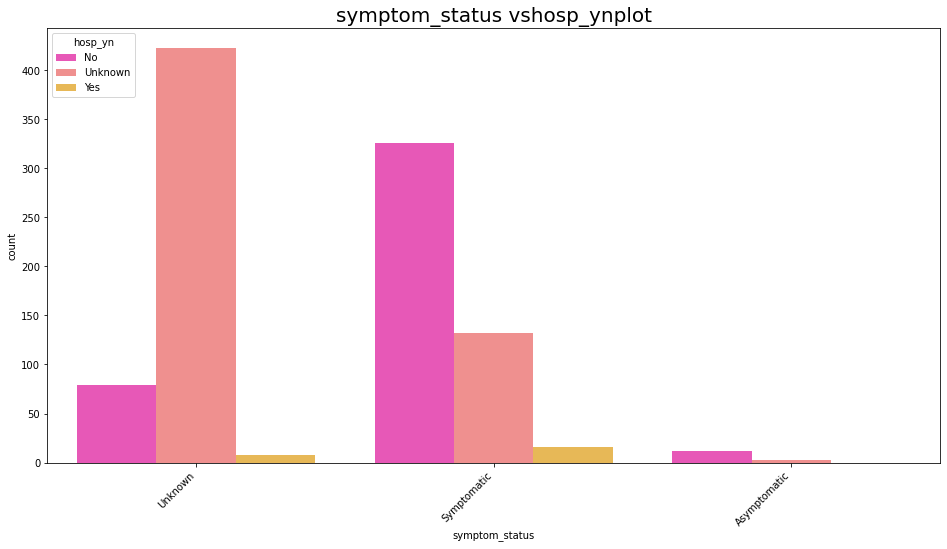

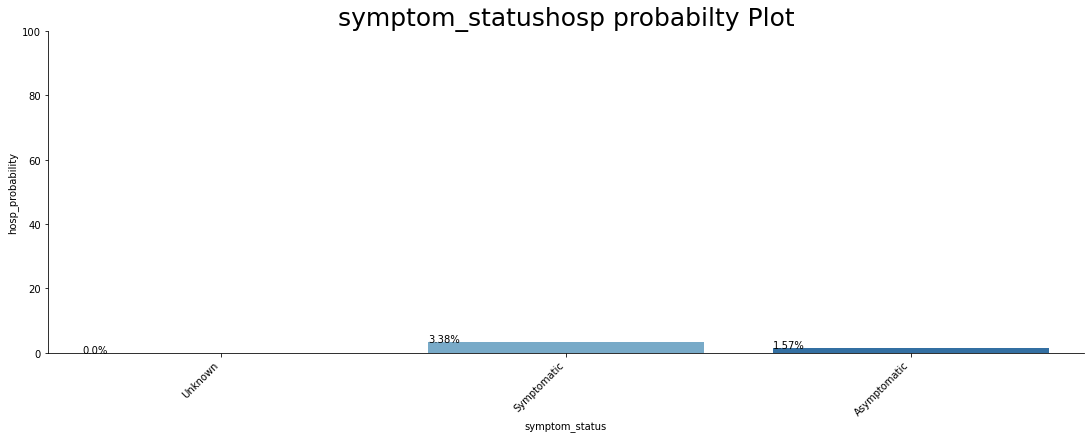

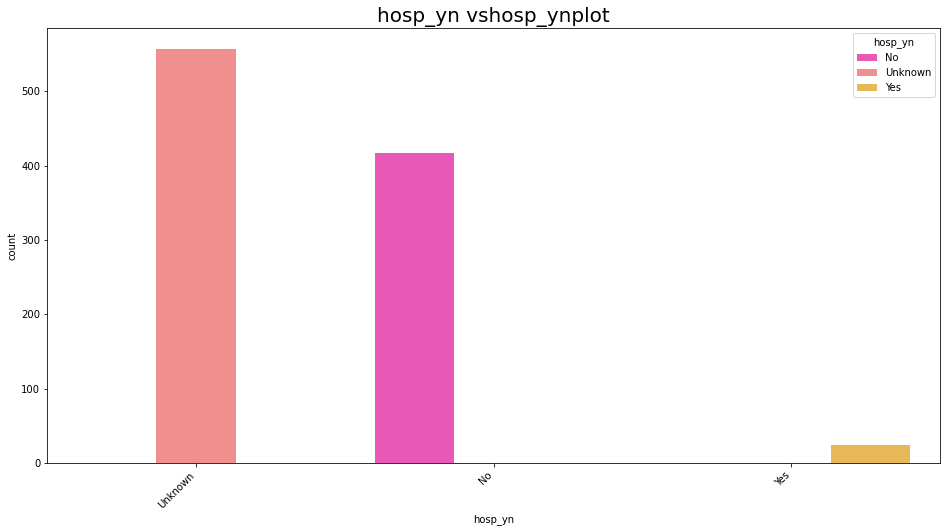

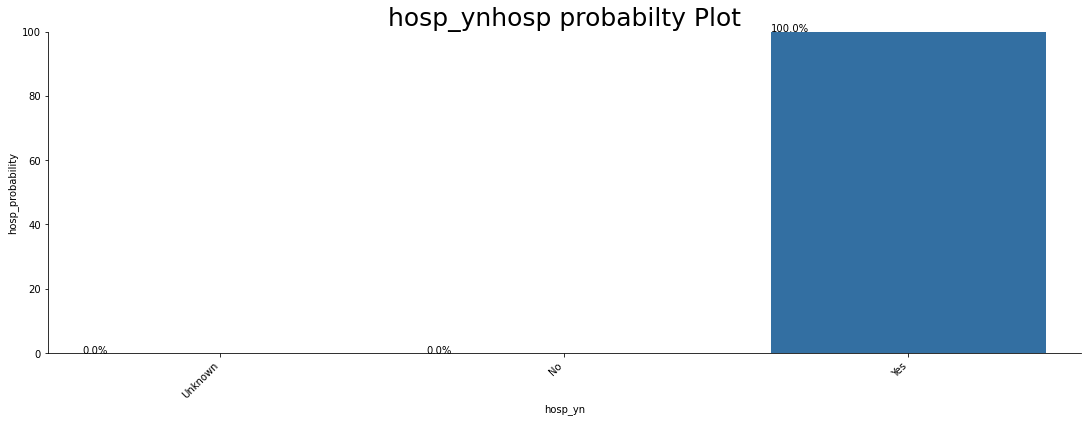

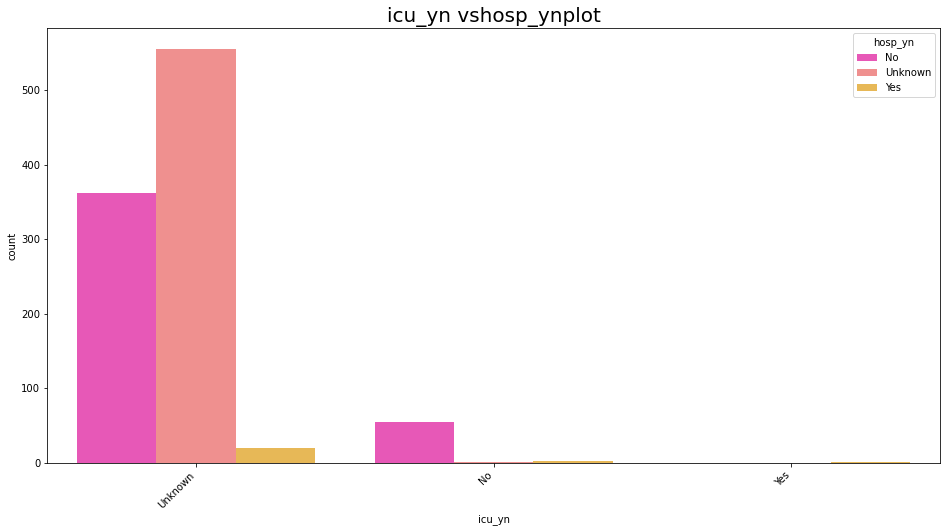

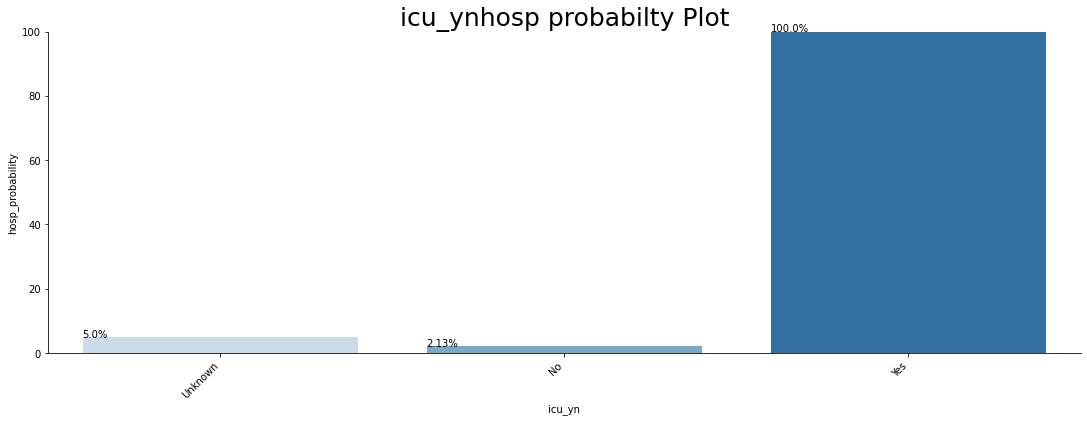

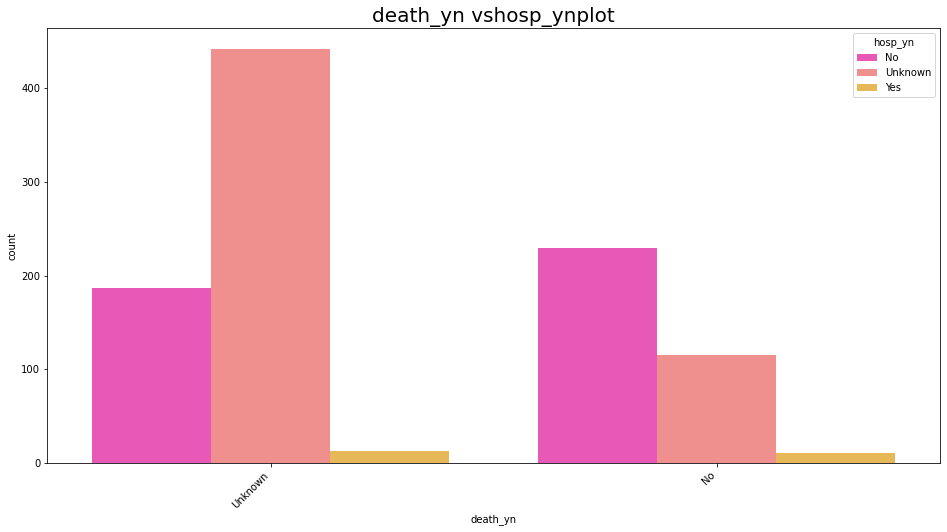

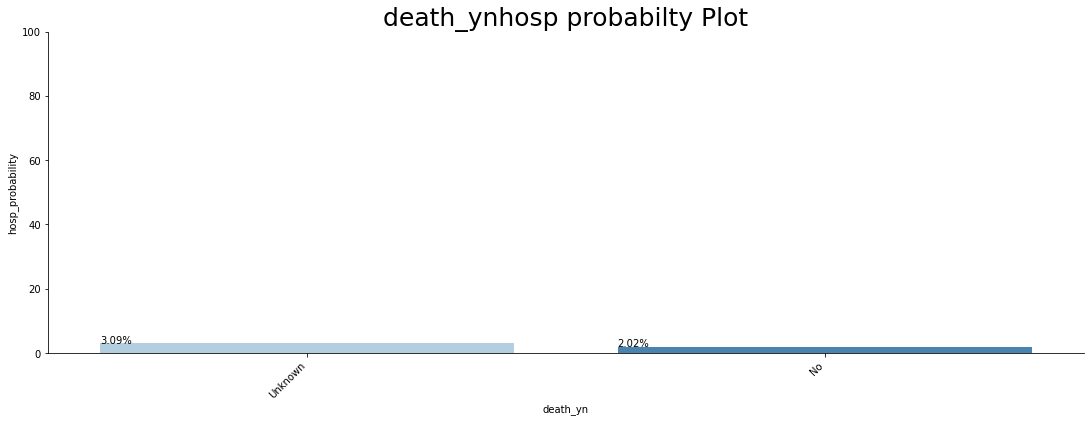

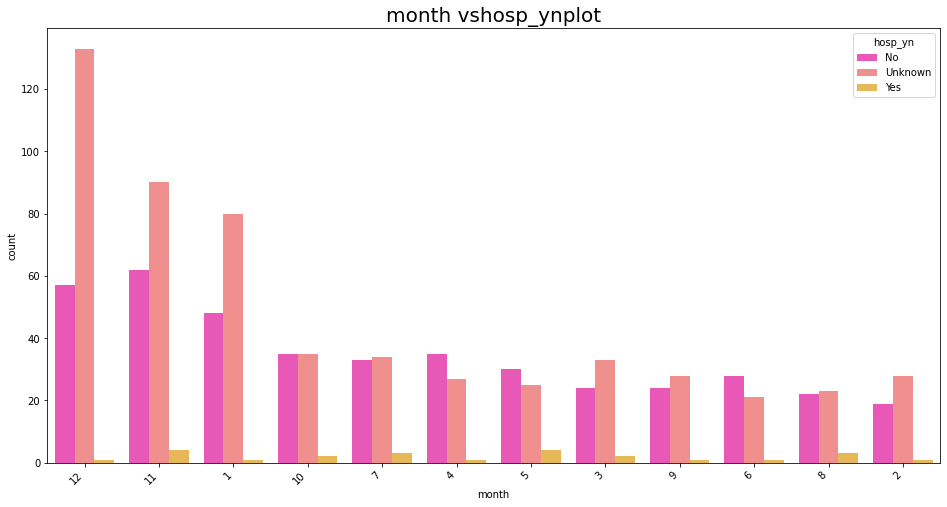

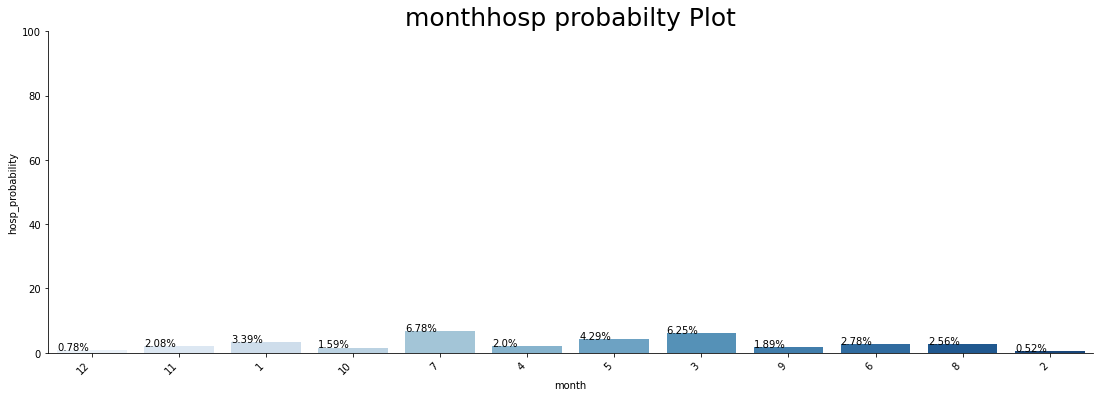

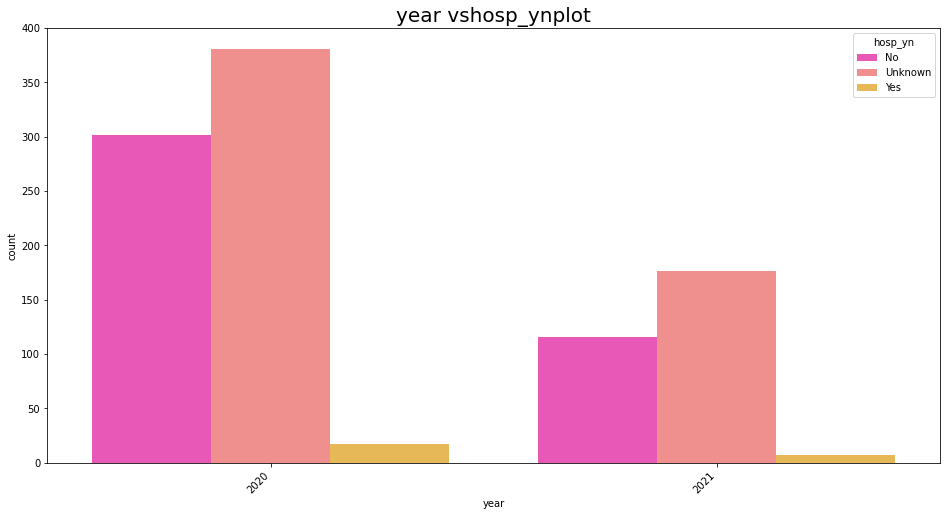

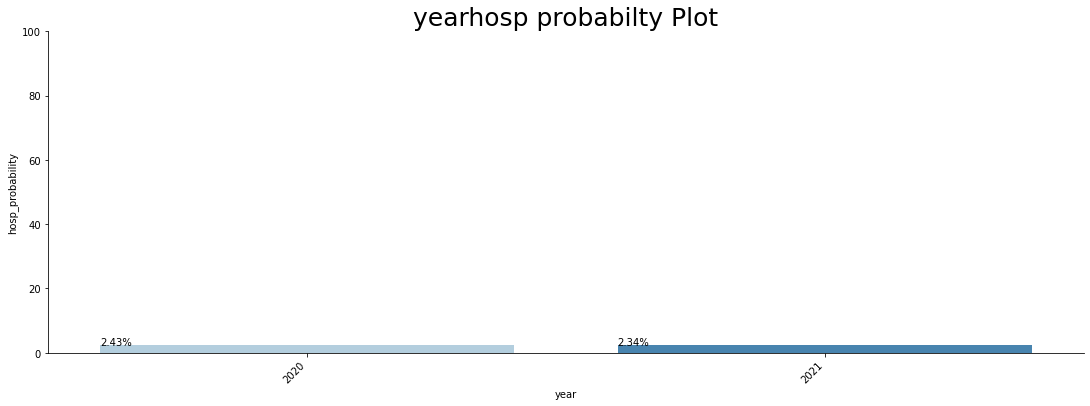

In [410]:
for i in df.columns:
    if i not in['county_fips_code','res_county','FIPS']:
        bivariate_cate(df, i,'hosp_yn')


In [405]:
for i in df.columns:
    if i not in['county_fips_code','res_county','FIPS']:
        chi_contigen(df,i,'hosp_yn')

case_month
stat=59.763, p=0.001
Probably dependent
res_state
stat=334.777, p=0.000
Probably dependent
state_fips_code
stat=340.556, p=0.000
Probably dependent
age_group
stat=42.693, p=0.000
Probably dependent
sex
stat=0.774, p=0.942
Probably independent
race
stat=29.448, p=0.001
Probably dependent
ethnicity
stat=66.918, p=0.000
Probably dependent
process
stat=48.202, p=0.000
Probably dependent
exposure_yn
stat=54.670, p=0.000
Probably dependent
current_status
stat=7.078, p=0.029
Probably dependent
symptom_status
stat=312.424, p=0.000
Probably dependent
hosp_yn
stat=1996.000, p=0.000
Probably dependent
icu_yn
stat=112.075, p=0.000
Probably dependent
death_yn
stat=124.869, p=0.000
Probably dependent
month
stat=43.996, p=0.004
Probably dependent
year
stat=1.631, p=0.442
Probably independent


INSIGHTS:
There were many Unknown status values in the sample dataset. for analysis we decided to keep them on as removing or replacing them would have created an unnecessary bias in the analysis. Analysis of the parent dataset(3.1Ghz) would likely may likely give better distribution and the reduced proportion of Unknown values.


The analysis of the sample dataset revealed


1.Hospitalisation counted for only 2.4% cases with unknown status accounting for 55%.

2.Highest number of cases state wise were found in Georgia followed by Ohio and North Carolina.

3.There was an increasing trend in the number of cases from april 2020 to Dec 2021 when the numbers peaked followed by the decrease in the numbers to present.

4.Most of the infected cases belonged to the age group 18-49 followed 0-17years.

5.Females were more infected as compared to their male counterparts.

6.Apart from the unknown parameters in the various columns which constituted the maximum, we could infer that whites were more  affected followed by blacks, 

7.Asymptomatic cases constituted 47%

8.Deaths were not reported in any case our sample dataset.

9.More cases were reported in 2020 as compared to 2021 sofar.






HOSPITALISATION RATES
INSIGHTS:
1. Hospitlisation rate was seen highest in the states of Michigan,Texas and Arizona.


2. Hosp rate was also seen higher in the age group of >65years (13.5%) with only 2% in the age group 18-49.


3. Hosp rate was seen more or less same between gender(2.2 vs2.5%)


4. Whites were more hospitilized (4.2%).


5. Non hispanics underwent hospitilisation more.(23%)


6. Known exposure was associated with 3% cases of hospitilised patients.


7. symptomatic patients(3%) were hospitilised more than the asymptomatic cases(0%).


8. Hospitlisation rate were seen highest in feb-mar 2020 followed by dec-jan 2021 and feb-mar 2021.